In [121]:
import pandas as pd
import scipy
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Load a picture and details from it

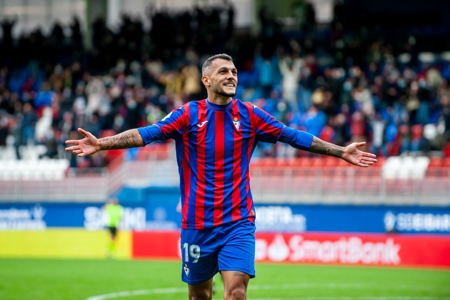

In [31]:
from PIL import Image

img = Image.open("sto.jpg")
img = img.resize((450,300))
img

# Find Meta Data

In [57]:
height, width = img.size
print("Image mode is %s" % img.mode)
print("Image height is %i and image width is %i" % (height, width))


Image mode is RGB
Image height is 3072 and image width is 4096


In [72]:
img = Image.open("metadata.jpg")
metadata = img._getexif()
metadata

{34853: {1: 'N', 2: (56.0, 6.0, 49.43), 3: 'E', 4: (10.0, 7.0, 35.73)},
 34665: 119,
 271: 'Nothing',
 272: 'A063',
 274: 1,
 306: '2024:09:11 09:37:55',
 37378: 1.88,
 36867: '2024:09:11 09:37:55',
 36868: '2024:09:11 09:37:55',
 41987: 0,
 34855: 100,
 37385: 0,
 37386: 5.59,
 36880: '+02:00',
 36881: '+02:00',
 36882: '+02:00',
 33434: 0.004,
 37500: b'NTDebugStart,MOTION:,ID:0,LUX:187.5455NTDebugEnd',
 33437: 1.88}

# Wine tasting clain (Good wine = High alcohol)

In [76]:
df_redwine = pd.read_csv("winequality-red.csv")
print(df_redwine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [77]:
print(df_redwine["quality"].value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


In [90]:
from scipy.stats import spearmanr

correlation = spearmanr(
    a=df_redwine["quality"], 
    b=df_redwine["alcohol"]
    )

print(correlation)

SignificanceResult(statistic=np.float64(0.4785316874702435), pvalue=np.float64(2.7268377398472646e-92))


## Stripe plot

c:\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='quality', ylabel='alcohol'>

c:\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 39.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


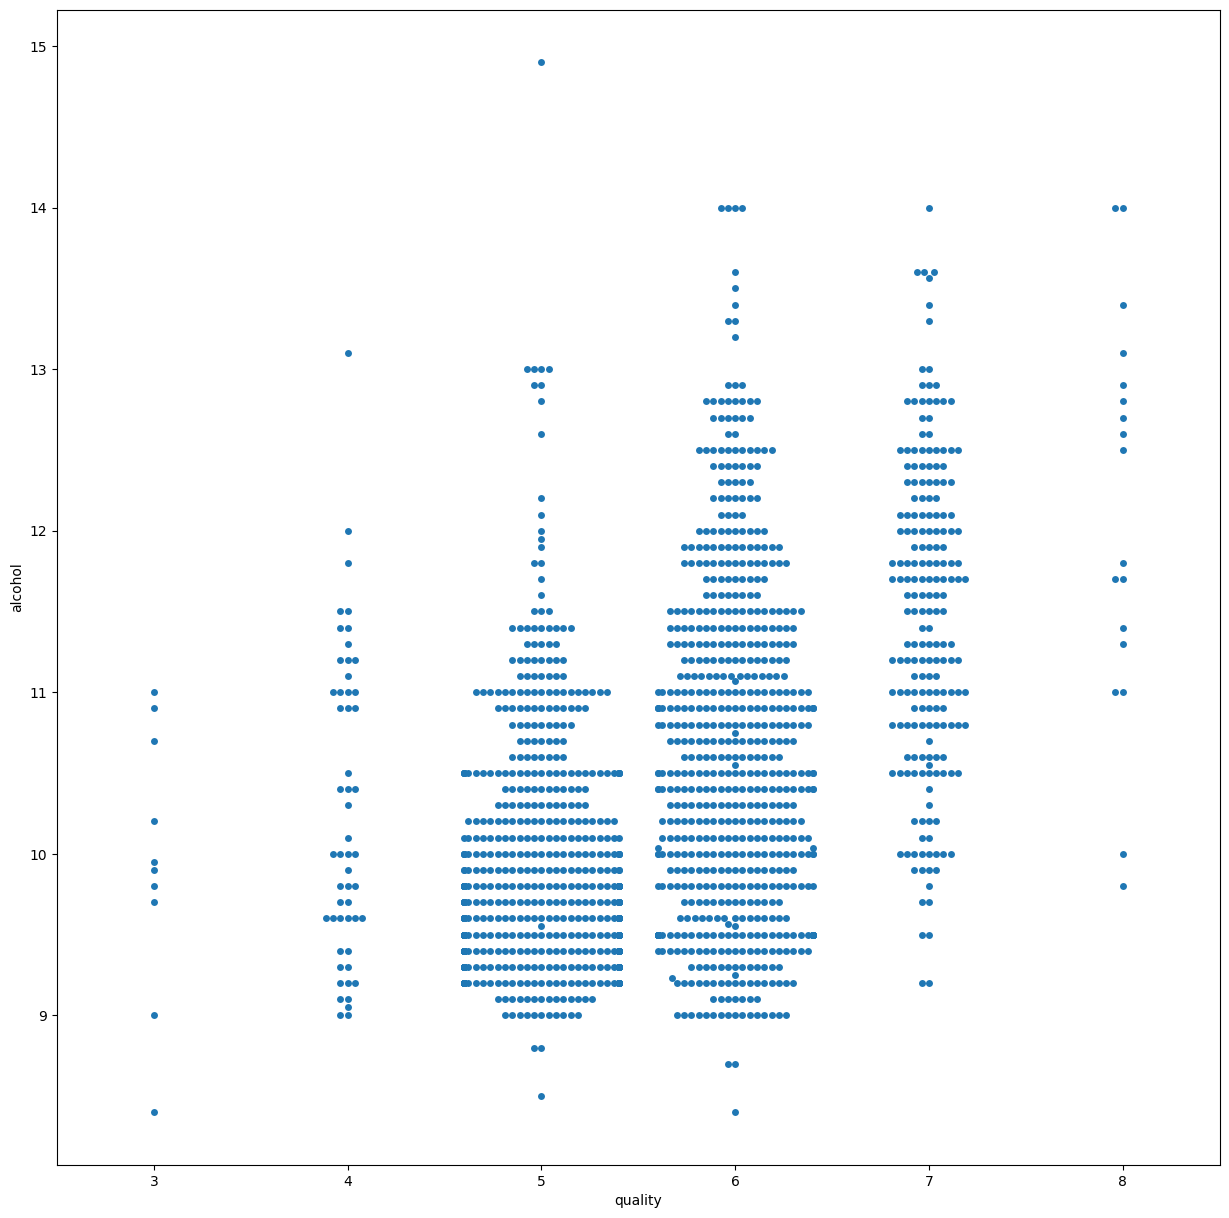

In [101]:
fig, ax = plt.subplots(figsize=(15,15))
sns.swarmplot(x="quality", 
              y="alcohol", 
              data=df_redwine,
              size=5
              )

## Scatterplot

<Axes: xlabel='quality', ylabel='alcohol'>

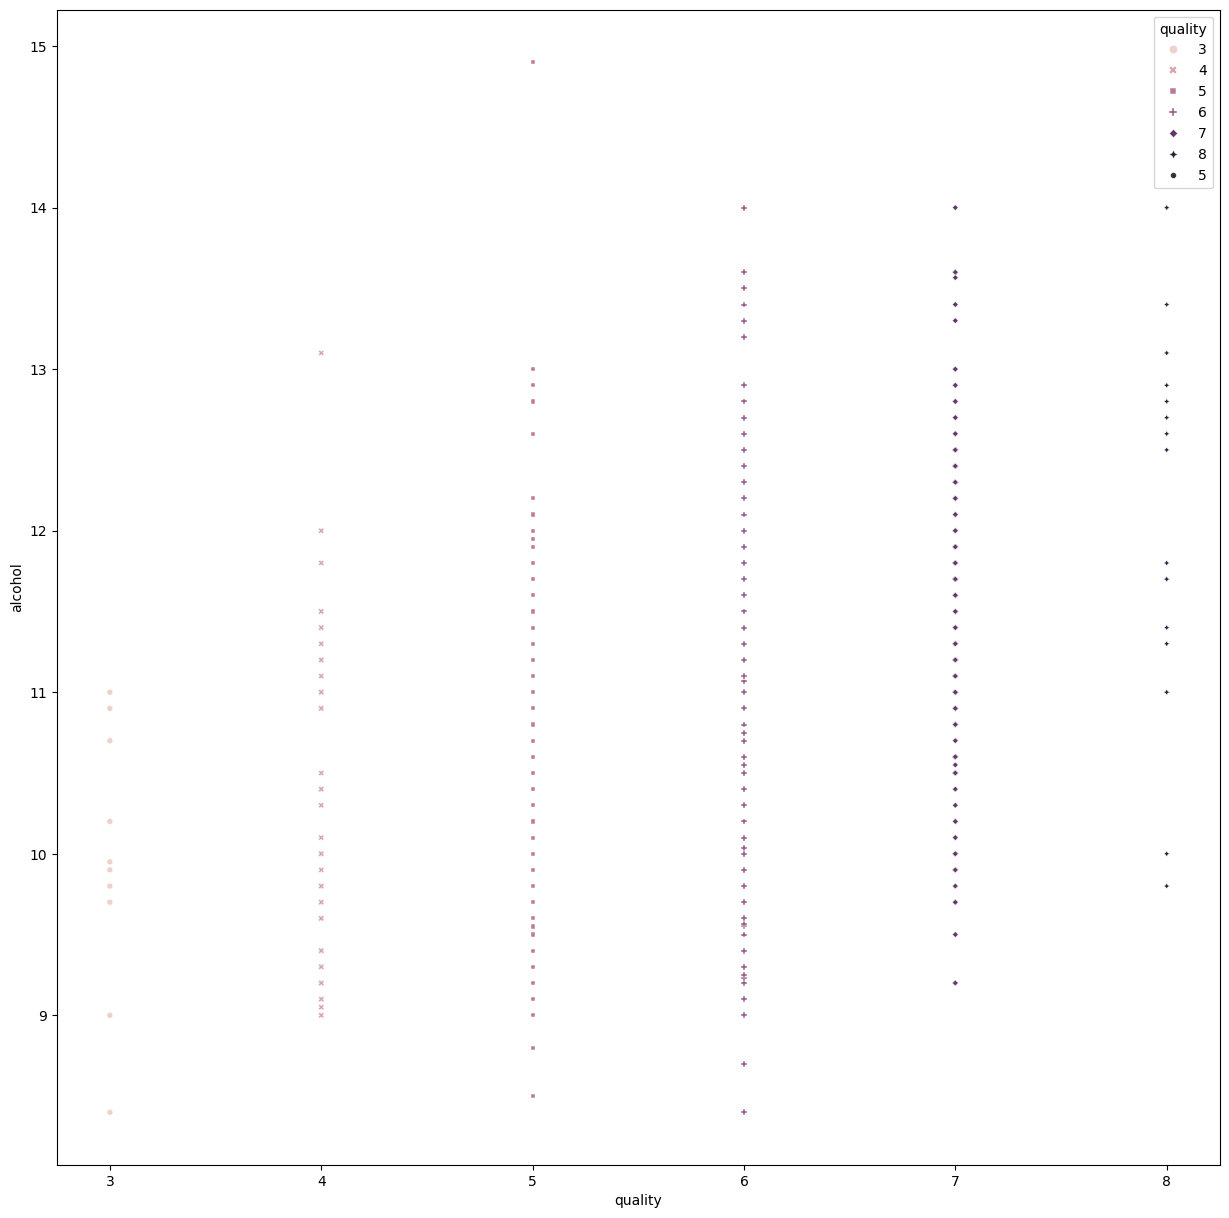

In [120]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(data=df_redwine,
              x="quality", 
              y="alcohol", 
              style="quality",
              hue="quality",
              size=5
              )

# Removing anomalies

## Trimmed average

In [123]:
print("Normal average")
print(df_redwine.mean())

print("Trimmed average")
print(scipy.stats.trim_mean(a=df_redwine, proportiontocut=0.05))

Normal average
fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64
Trimmed average
[ 8.22248439  0.52053435  0.26359473  2.33171409  0.08097363 15.05100625
 43.58848022  0.99674212  3.30984733  0.64276891 10.35678927  5.63428175]


## z-Score

In [136]:
from spicy import stats

treshold = 3

z = np.abs(stats.zscore(df_redwine))
df_z = df_redwine[(z < 3).all(axis=1)]
print(df_z.shape)

(1451, 12)


<Axes: xlabel='quality', ylabel='citric acid'>

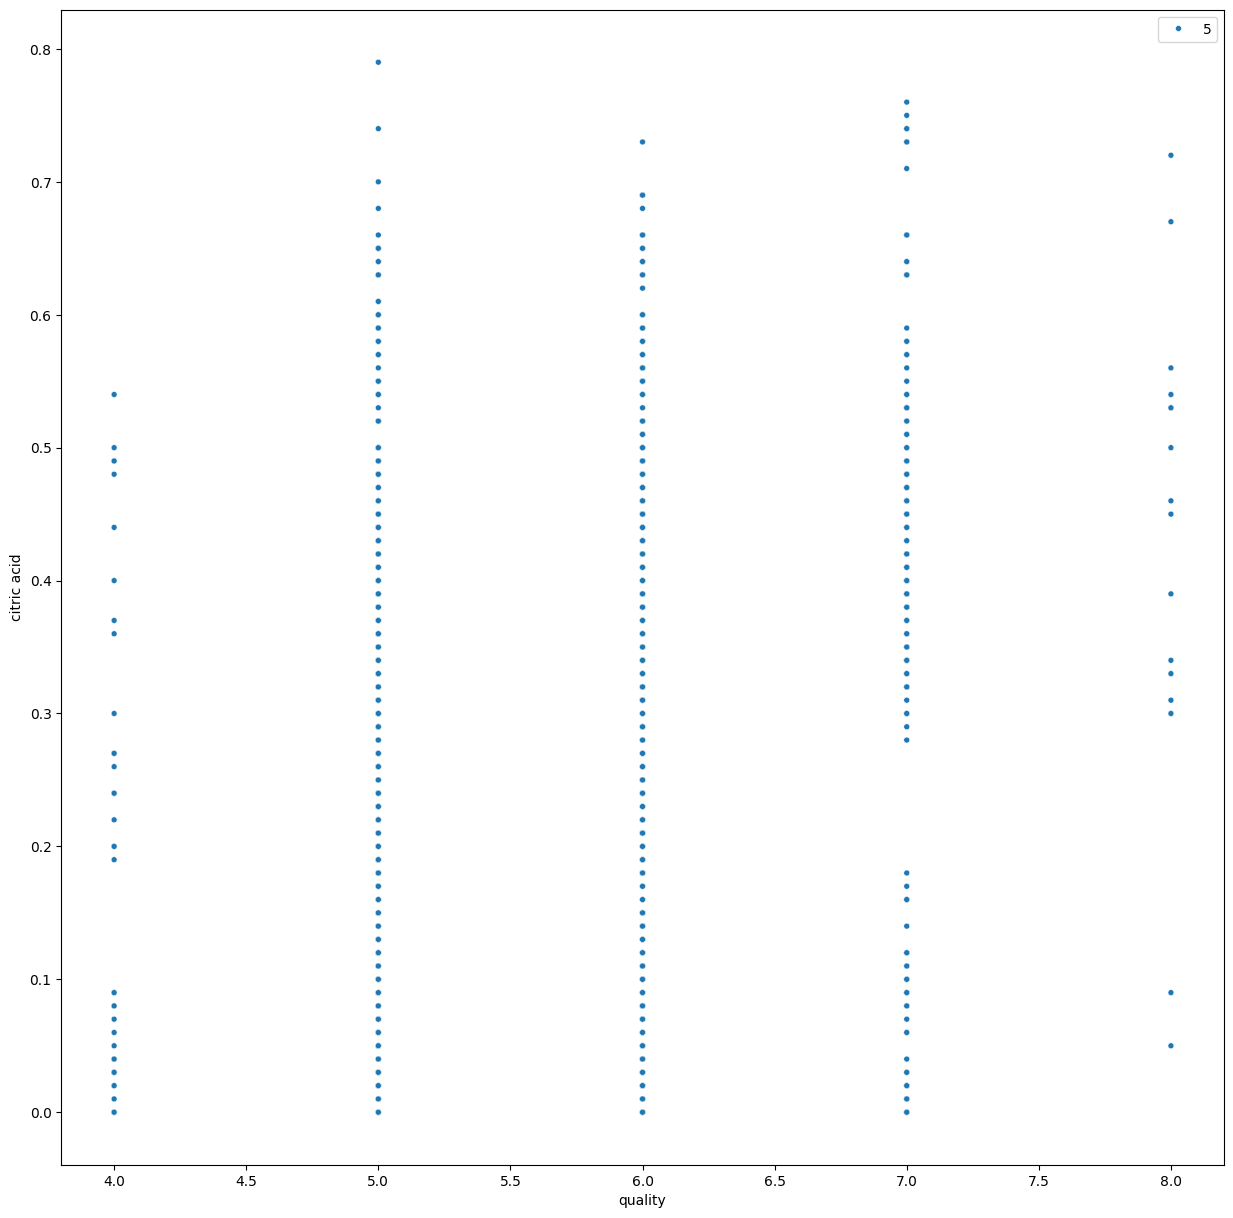

In [128]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(
    x="quality", 
    y="citric acid", 
    data=df_z,
    size=5
)

In [159]:
from sklearn.preprocessing import MinMaxScaler

x = np.array(df_redwine.loc[:, df_redwine.colums != "quality"])
x = np.array(df_redwine.loc[:, df_redwine.colums == "quality"])

x = MinMaxScaler().fit_transform(x)

treshold = 3

z = np.abs(stats.zscore(x))
df_z = x[(z < 3).all(axis=1)]
print(x.shape)


ModuleNotFoundError: No module named 'sklearn'

In [140]:
Q1 = df_redwine.quantile(0.25)
Q3 = df_redwine.quantile(0.75)
IQR = Q3 - Q1
iqr_df = df_redwine[((df_redwine < (Q1 - 1.5 * IQR)) | (df_redwine > (Q3 + 1.5 * IQR))).any(axis=1)]
print(iqr_df.shape)

(1599, 12)
